In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "DAI.DE"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [3]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-08,30.369984,30.379266,30.023464,30.280260,2655968
2010-11-09,30.147225,31.112529,30.107003,30.964022,3657609
2010-11-10,30.787665,30.883576,30.134846,30.428768,3916423
2010-11-11,30.667000,30.784568,30.308103,30.667000,3174636
2010-11-12,30.072966,31.081587,29.652192,30.865013,4881581


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2533 entries, 2010-11-08 to 2020-11-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2533 non-null   float64
 1   High    2533 non-null   float64
 2   Low     2533 non-null   float64
 3   Close   2533 non-null   float64
 4   Volume  2533 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.7 KB


<AxesSubplot:xlabel='Date'>

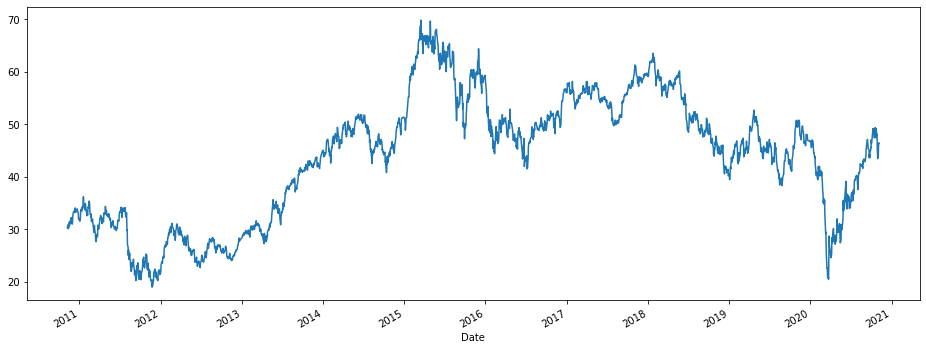

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1966, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1966/1966 [==============================] - 7s 3ms/step - loss: 0.0365
Epoch 2/100
1966/1966 [==============================] - 6s 3ms/step - loss: 0.0056A: 1s 
Epoch 3/100
1966/1966 [==============================] - 6s 3ms/step - loss: 0.0050
Epoch 4/100
1966/1966 [==============================] - 5s 3ms/step - loss: 0.0042
Epoch 5/100
1966/1966 [==============================] - 6s 3ms/step - loss: 0.0045
Epoch 6/100
1966/1966 [==============================] - 6s 3ms/step - loss: 0.0044
Epoch 7/100
1966/1966 [==============================] - 6s 3ms/step - loss: 0.0041
Epoch 8/100
1966/1966 [==============================] - 7s 4ms/step - loss: 0.0039
Epoch 9/100
1966/1966 [==============================] - 7s 3ms/step - loss: 0.0037
Epoch 10/100
1966/1966 [==============================] - 7s 3ms/step - loss: 0.0042
Epoch 11/100
1966/1966 [==============================] - 7s 3ms/step - loss: 0.0035
Epoch 12/100
1966/1966 [==============================] - 7s 3ms/ste

# Testing

In [16]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
X_test

array([[[0.54022022],
        [0.54403111],
        [0.53242527],
        ...,
        [0.4955292 ],
        [0.52012661],
        [0.53467715]],

       [[0.54403111],
        [0.53242527],
        [0.56533724],
        ...,
        [0.52012661],
        [0.53467715],
        [0.52584286]],

       [[0.53242527],
        [0.56533724],
        [0.55095989],
        ...,
        [0.53467715],
        [0.52584286],
        [0.52844122]],

       ...,

       [[0.43207079],
        [0.43885259],
        [0.45723221],
        ...,
        [0.494188  ],
        [0.48082102],
        [0.5054909 ]],

       [[0.43885259],
        [0.45723221],
        [0.46214655],
        ...,
        [0.48082102],
        [0.5054909 ],
        [0.53979299]],

       [[0.45723221],
        [0.46214655],
        [0.45870653],
        ...,
        [0.5054909 ],
        [0.53979299],
        [0.53802383]]])

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
X_test

array([[[0.54022022],
        [0.54403111],
        [0.53242527],
        ...,
        [0.4955292 ],
        [0.52012661],
        [0.53467715]],

       [[0.54403111],
        [0.53242527],
        [0.56533724],
        ...,
        [0.52012661],
        [0.53467715],
        [0.52584286]],

       [[0.53242527],
        [0.56533724],
        [0.55095989],
        ...,
        [0.53467715],
        [0.52584286],
        [0.52844122]],

       ...,

       [[0.43207079],
        [0.43885259],
        [0.45723221],
        ...,
        [0.494188  ],
        [0.48082102],
        [0.5054909 ]],

       [[0.43885259],
        [0.45723221],
        [0.46214655],
        ...,
        [0.48082102],
        [0.5054909 ],
        [0.53979299]],

       [[0.45723221],
        [0.46214655],
        [0.45870653],
        ...,
        [0.5054909 ],
        [0.53979299],
        [0.53802383]]])

In [20]:
predicted_stock_price = regressor.predict(X_test)

In [21]:
predicted_stock_price

array([[0.52589047],
       [0.5319858 ],
       [0.5312562 ],
       [0.5306831 ],
       [0.53467375],
       [0.5437645 ],
       [0.5455029 ],
       [0.5390455 ],
       [0.5281636 ],
       [0.50119615],
       [0.47711268],
       [0.47235805],
       [0.48494226],
       [0.50159657],
       [0.49488813],
       [0.4911314 ],
       [0.49342918],
       [0.5010991 ],
       [0.5180413 ],
       [0.5294147 ],
       [0.53682894],
       [0.5439453 ],
       [0.54852444],
       [0.5447946 ],
       [0.54573905],
       [0.5541075 ],
       [0.557779  ],
       [0.5499514 ],
       [0.53678966],
       [0.5128258 ],
       [0.50332946],
       [0.5117215 ],
       [0.514184  ],
       [0.5152261 ],
       [0.51848996],
       [0.5234111 ],
       [0.523149  ],
       [0.5352373 ],
       [0.53412133],
       [0.52937496],
       [0.51648813],
       [0.5095608 ],
       [0.50950116],
       [0.5149691 ],
       [0.5186805 ],
       [0.5325424 ],
       [0.55700463],
       [0.580

In [22]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(447, 1)

In [23]:
y_test

array([[0.52584286],
       [0.52844122],
       [0.53034669],
       [0.53675581],
       [0.54749546],
       [0.53866125],
       [0.5300001 ],
       [0.51787469],
       [0.47127835],
       [0.46166454],
       [0.47344364],
       [0.4900728 ],
       [0.50332411],
       [0.47249085],
       [0.49379702],
       [0.49397017],
       [0.50332416],
       [0.52844117],
       [0.52844115],
       [0.53900764],
       [0.54749542],
       [0.54818836],
       [0.53675584],
       [0.54784189],
       [0.55788869],
       [0.55199926],
       [0.53710219],
       [0.52480352],
       [0.48773435],
       [0.50211166],
       [0.51544967],
       [0.50072589],
       [0.51129228],
       [0.51735508],
       [0.52220524],
       [0.51562285],
       [0.54628293],
       [0.51978008],
       [0.52445711],
       [0.50107231],
       [0.50592252],
       [0.50609574],
       [0.51389062],
       [0.51354416],
       [0.54229893],
       [0.57001423],
       [0.58733629],
       [0.589

In [24]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [25]:
predicted_stock_price

array([[45.692757],
       [46.00284 ],
       [45.96572 ],
       [45.936565],
       [46.139576],
       [46.602036],
       [46.69047 ],
       [46.361977],
       [45.808395],
       [44.436516],
       [43.211353],
       [42.969475],
       [43.609653],
       [44.456886],
       [44.115616],
       [43.924507],
       [44.041397],
       [44.43158 ],
       [45.293457],
       [45.87204 ],
       [46.249214],
       [46.611237],
       [46.844185],
       [46.65444 ],
       [46.702488],
       [47.1282  ],
       [47.31498 ],
       [46.916775],
       [46.247215],
       [45.028133],
       [44.54504 ],
       [44.97196 ],
       [45.09723 ],
       [45.150246],
       [45.31628 ],
       [45.566628],
       [45.553295],
       [46.168247],
       [46.111473],
       [45.870018],
       [45.214443],
       [44.86204 ],
       [44.859005],
       [45.13717 ],
       [45.325974],
       [46.03115 ],
       [47.275585],
       [48.44708 ],
       [48.949184],
       [49.338017],


In [26]:
actual_stock_price.shape

(447, 1)

In [27]:
predicted_stock_price.shape

(447, 1)

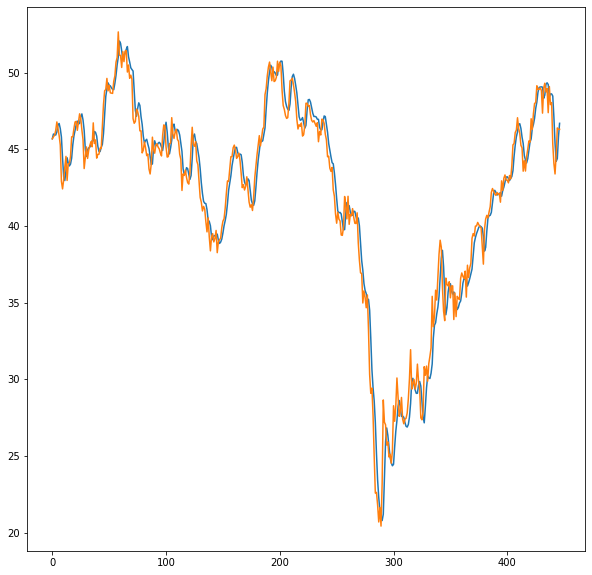

In [28]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [29]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [30]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


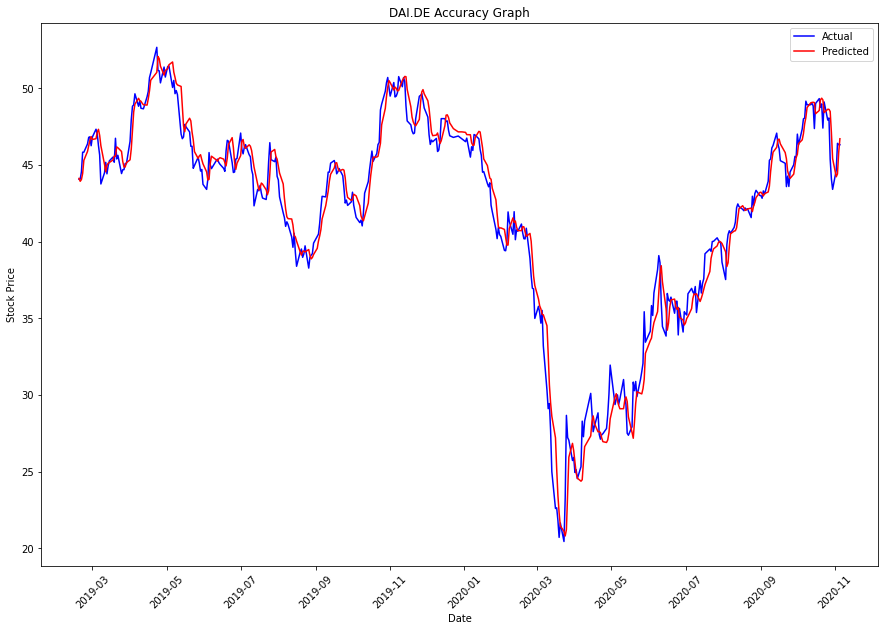

In [40]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'],fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

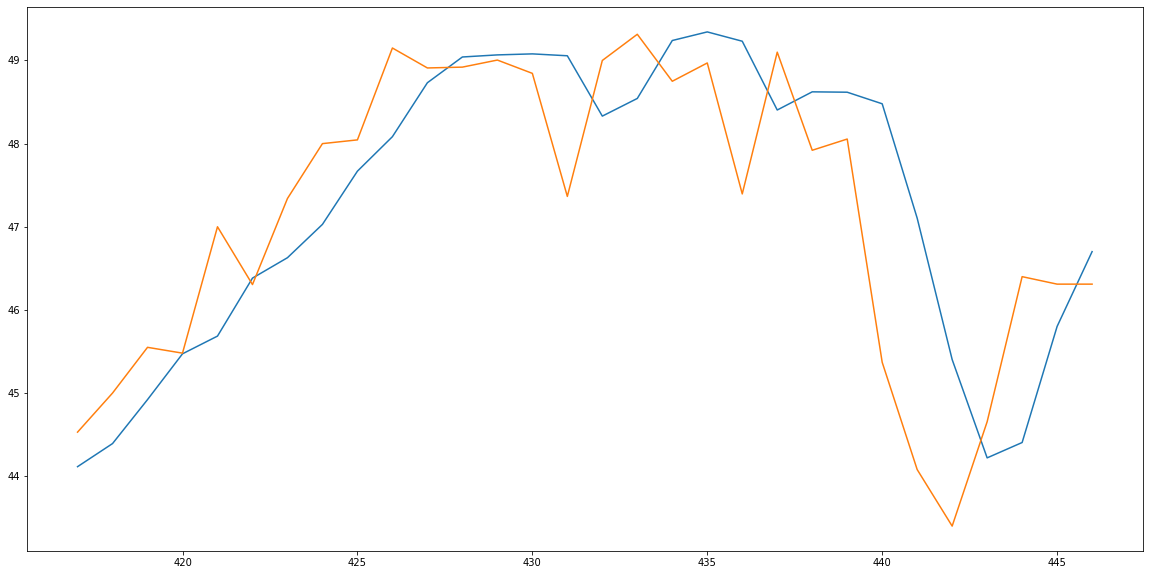

In [37]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [39]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)